In [158]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [159]:
path = "/content/HepatitisCdata.csv"
hepatitisC_df = pd.read_csv(path, index_col="Unnamed: 0")
df = hepatitisC_df.copy()

In [160]:
#Liver Enzyme Ratio
df['Enzyme Ratio'] = df['AST'] / df['ALT']

In [161]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Enzyme Ratio
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,2.870130
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.372222
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.453039
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.738562
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.760736


In [162]:
df.shape #returns the tuple representating the dimensions of the dataframe

(615, 14)

In [163]:
df.info() #summary of the data type of each column and no: of null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      615 non-null    object 
 1   Age           615 non-null    int64  
 2   Sex           615 non-null    object 
 3   ALB           614 non-null    float64
 4   ALP           597 non-null    float64
 5   ALT           614 non-null    float64
 6   AST           615 non-null    float64
 7   BIL           615 non-null    float64
 8   CHE           615 non-null    float64
 9   CHOL          605 non-null    float64
 10  CREA          615 non-null    float64
 11  GGT           615 non-null    float64
 12  PROT          614 non-null    float64
 13  Enzyme Ratio  614 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 72.1+ KB


In [164]:
df.describe() #statistical summary of the numerical values in the df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Enzyme Ratio
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,2.144425
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,5.289798
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.410853
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.867179
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,1.115690
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,1.413144
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,89.222222


In [165]:
df.describe(include=object) #statistical summary of the string/obj columns in the df

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [166]:
df[["Label", "Category"]] = (   # Create two new features
    df["Category"]              # from the Policy feature i.e category
    .str                        # through the string accessor
    .split("=", expand=True)    # by splitting on " "
                                # and expanding the result into separate columns
)

<ipython-input-167-5d3eb864bfc7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']) #plotting histogram and kde plot using age


<Axes: xlabel='Age', ylabel='Density'>

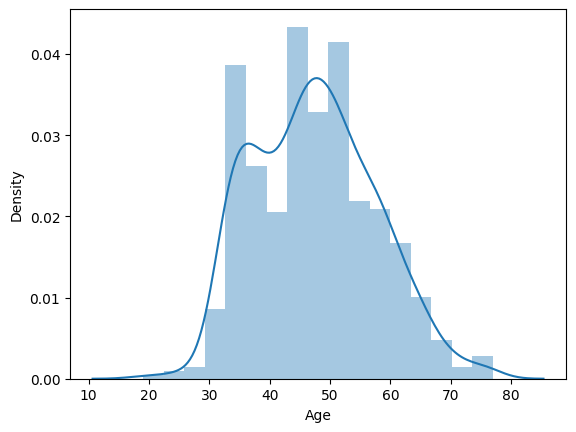

In [167]:
sns.distplot(df['Age']) #plotting histogram and kde plot using age

<Axes: xlabel='Category', ylabel='Age'>

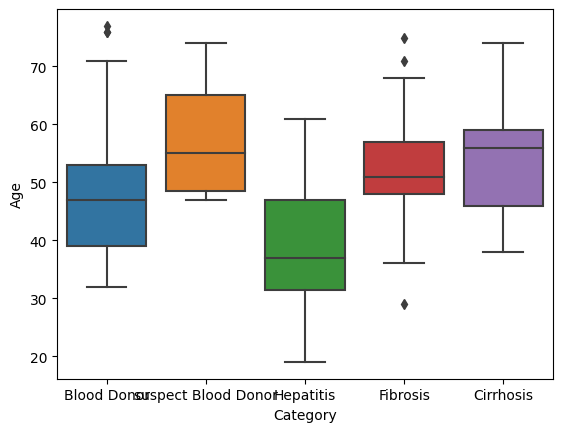

In [168]:
# Age and sex with survived
sns.boxplot(data=df, x='Category', y='Age')

<Axes: xlabel='Age', ylabel='Sex'>

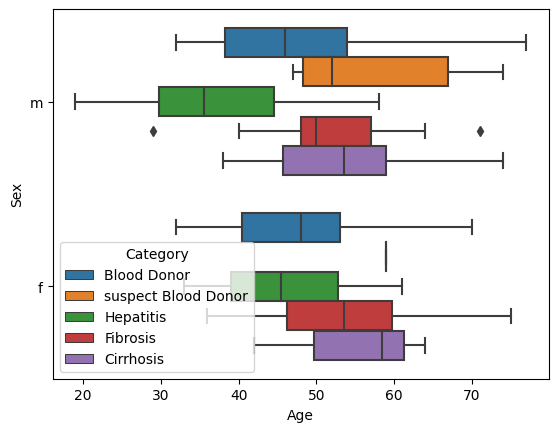

In [169]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Category')

In [170]:
df['Category'].unique()

array(['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], dtype=object)

In [171]:
df.corr().style.background_gradient(cmap = 'viridis') #exploring the correlation between numerical variables
                                                     #darker colors indicating higher correlation coefficients 
                                                    #lighter colors indicating lower correlation coefficients.

<ipython-input-171-031be9911b25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap = 'viridis') #exploring the correlation between numerical variables


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Enzyme Ratio
Age,1.000000,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668,0.123112
ALB,-0.197498,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197,-0.275400
ALP,0.173340,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109,0.057089
ALT,-0.006021,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730,-0.194941
AST,0.088666,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071,0.404940
BIL,0.032492,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638,0.420458
CHE,-0.075093,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427,-0.327074
CHOL,0.125641,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071,-0.280696
CREA,-0.022296,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704,0.110360
GGT,0.153087,-0.155749,0.454630,0.248114,0.491263,0.217024,-0.110345,-0.006895,0.121003,1.000000,-0.011767,0.214797


# Preprocessing

In [172]:
X = df.drop(['Category','Label'], axis=1) #creates a new df by dropping catergory and label and creates a new df with predictor variables
y = df['Category'] #creates a new series that contain only the target varibales

In [173]:
missing_value_count = X.isnull().sum() #identifies the columns with missing vaules before ML models can be trained on the data
missing_value_count 

Age              0
Sex              0
ALB              1
ALP             18
ALT              1
AST              0
BIL              0
CHE              0
CHOL            10
CREA             0
GGT              0
PROT             1
Enzyme Ratio     1
dtype: int64

In [174]:
object_cols = ['Sex'] #preparing categorical data for ml task by transforming them into a format that can be used by ml algorithms.
X1 = X.copy()
ordinal_encoder = OrdinalEncoder()
X1[object_cols] = ordinal_encoder.fit_transform(X[object_cols]) 

In [175]:
from sklearn.impute import SimpleImputer #to replace missing values in a dataset with imputed values
# Imputation
my_imputer = SimpleImputer()

X2 = pd.DataFrame(my_imputer.fit_transform(X1)) #new df with imputed values 

X2.columns = X1.columns 

In [176]:
X2  

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Enzyme Ratio
0,32.0,1.0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,2.870130
1,32.0,1.0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.372222
2,32.0,1.0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.453039
3,32.0,1.0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.738562
4,32.0,1.0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.760736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0.0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,18.694915
611,64.0,0.0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,15.310345
612,64.0,0.0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,28.285714
613,46.0,0.0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.589744


# Feature Selection

In [177]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() #converts categorical variables in a dataset to integer 
discrete_features = X.dtypes == int #creates a mask to identify which columns have integer data type,which can be useful for ml algorithms 
                                    #that handles discrete data differently.

In [178]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#Mutual information(MI) scores measure the amount of information one variable provides about another variable
#higher scores indicate more informative features for predicting the target variable
mi_scores = make_mi_scores(X2, y, discrete_features) 
mi_scores 

Enzyme Ratio    0.256653
AST             0.229887
Age             0.177218
ALB             0.161170
ALP             0.150645
ALT             0.128143
CHE             0.119386
BIL             0.114779
GGT             0.109618
CREA            0.102812
PROT            0.074987
CHOL            0.067116
Sex             0.006949
Name: MI Scores, dtype: float64

In [179]:
X2= X2.drop('Sex', axis=1)

In [180]:
X = X2.copy()

## Machine Learning Model Building

## Decision Tree

In [181]:
#Accuracy in binary
decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)
predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
                      precision    recall  f1-score   support

        Blood Donor       0.97      0.97      0.97       533
          Cirrhosis       0.82      0.77      0.79        30
           Fibrosis       0.24      0.38      0.30        21
          Hepatitis       0.38      0.25      0.30        24
suspect Blood Donor       0.40      0.29      0.33         7

           accuracy                           0.91       615
          macro avg       0.56      0.53      0.54       615
       weighted avg       0.91      0.91      0.91       615



In [182]:
#Accuracy in percentage
decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)
predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
report = classification_report(y, predict)

# Find the indices of the first and last digit of the classification report
start_index = report.find('accuracy')
end_index = report.find('macro avg')

# Extract the accuracy score from the classification report
accuracy_score = report[start_index:end_index].split()[1]

# Convert the accuracy score to percentage and print
accuracy_percent = float(accuracy_score) * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))

Accuracy: 91.00%


## Random Forest Classifier

In [183]:
#Accuracy in binary
random_forest = RandomForestClassifier(random_state = 0)   
random_forest.fit(X,y)   
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
                      precision    recall  f1-score   support

        Blood Donor       0.97      0.99      0.98       533
          Cirrhosis       0.81      0.83      0.82        30
           Fibrosis       0.38      0.38      0.38        21
          Hepatitis       0.44      0.29      0.35        24
suspect Blood Donor       1.00      0.14      0.25         7

           accuracy                           0.93       615
          macro avg       0.72      0.53      0.56       615
       weighted avg       0.92      0.93      0.92       615



In [184]:
#Accuracy in percentage
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X,y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
report = classification_report(y, predict)

# Find the indices of the first and last digit of the classification report
start_index = report.find('accuracy')
end_index = report.find('macro avg')

# Extract the accuracy score from the classification report
accuracy_score = report[start_index:end_index].split()[1]

# Convert the accuracy score to percentage and print
accuracy_percent = float(accuracy_score) * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))


Accuracy: 93.00%


## KNN Neighbors Classifier

In [185]:
#Accuracy in binary
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
                      precision    recall  f1-score   support

        Blood Donor       0.94      1.00      0.97       533
          Cirrhosis       0.73      0.53      0.62        30
           Fibrosis       0.33      0.19      0.24        21
          Hepatitis       0.38      0.21      0.27        24
suspect Blood Donor       1.00      0.14      0.25         7

           accuracy                           0.91       615
          macro avg       0.68      0.41      0.47       615
       weighted avg       0.88      0.91      0.89       615



In [186]:
#Accuracy in percentage
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
report = classification_report(y, predict)

# Find the indices of the first and last digit of the classification report
start_index = report.find('accuracy')
end_index = report.find('macro avg')

# Extract the accuracy score from the classification report
accuracy_score = report[start_index:end_index].split()[1]

# Convert the accuracy score to percentage and print
accuracy_percent = float(accuracy_score) * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))

Accuracy: 91.00%


## Gaussian Naive Baiyes

In [187]:
#Accuracy in binary
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
                      precision    recall  f1-score   support

        Blood Donor       0.98      0.96      0.97       533
          Cirrhosis       0.81      0.73      0.77        30
           Fibrosis       0.33      0.48      0.39        21
          Hepatitis       0.37      0.42      0.39        24
suspect Blood Donor       0.36      0.57      0.44         7

           accuracy                           0.90       615
          macro avg       0.57      0.63      0.59       615
       weighted avg       0.92      0.90      0.91       615



In [188]:
#Accuracy in percentage
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
report = classification_report(y, predict)

# Find the indices of the first and last digit of the classification report
start_index = report.find('accuracy')
end_index = report.find('macro avg')

# Extract the accuracy score from the classification report
accuracy_score = report[start_index:end_index].split()[1]

# Convert the accuracy score to percentage and print
accuracy_percent = float(accuracy_score) * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))

Accuracy: 90.00%


## Support Vector Classifier

In [189]:
#Accuracy in binary
svc = SVC()
svc.fit(X,y)
predict = cross_val_predict(estimator = svc, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
                      precision    recall  f1-score   support

        Blood Donor       0.93      1.00      0.97       533
          Cirrhosis       0.73      0.73      0.73        30
           Fibrosis       0.22      0.10      0.13        21
          Hepatitis       0.00      0.00      0.00        24
suspect Blood Donor       0.00      0.00      0.00         7

           accuracy                           0.90       615
          macro avg       0.38      0.37      0.37       615
       weighted avg       0.85      0.90      0.88       615



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
#Accuracy in percentage
svc = SVC()
svc.fit(X,y)
predict = cross_val_predict(estimator = svc, X = X, y = y, cv = 5)
report = classification_report(y, predict)

# Find the indices of the first and last digit of the classification report
start_index = report.find('accuracy')
end_index = report.find('macro avg')

# Extract the accuracy score from the classification report
accuracy_score = report[start_index:end_index].split()[1]

# Convert the accuracy score to percentage and print
accuracy_percent = float(accuracy_score) * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))

Accuracy: 90.00%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy (%)')

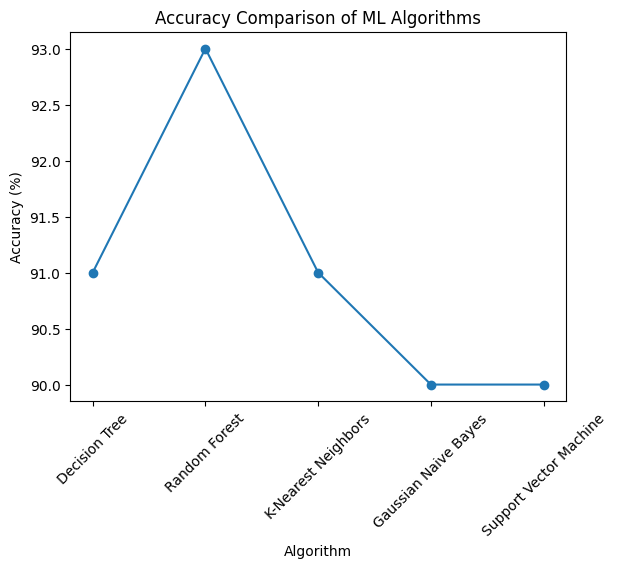

In [191]:
# Define classifiers and their names
classifiers = [dtc(random_state=0), RandomForestClassifier(random_state=0), KNeighborsClassifier(), GaussianNB(), SVC()]
names = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Machine']

# Calculate accuracies and store them in a list
accuracies = []
for clf in classifiers:
    predict = cross_val_predict(estimator=clf, X=X, y=y, cv=5)
    report = classification_report(y, predict)
    start_index = report.find('accuracy')
    end_index = report.find('macro avg')
    accuracy_score = report[start_index:end_index].split()[1]
    accuracy_percent = float(accuracy_score) * 100
    accuracies.append(accuracy_percent)

# Create the line chart
plt.plot(names, accuracies, marker='o')
plt.title('Accuracy Comparison of ML Algorithms')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')